In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [6]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': 0, 'A2': 0.13, 'f2': drive_freq,
              'delta_phi': 0.0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': False,
              'fix_A2': False}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [7]:
def func1_scale(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/Discharge/Response/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_scale = np.array(pool.map(func1_scale, range(100,200)))
    pool.close()

102   ******************
105   ******************
104   ******************
101   ******************
106   ******************
111   ******************
108   ******************
107   ******************
103   ******************
112   ******************
113   ******************
110   ******************
109   ******************
115   ******************
100   ******************
117   ******************
114   ******************
116   ******************
118   ******************
119   ******************
120   ******************
122   ******************
125   ******************
124   ******************
126   ******************
121   ******************
123   ******************
127   ******************
129   ******************
128   ******************
130   ******************
132   ******************
134   ******************
133   ******************
136   ******************
137   ******************
139   ******************
131   ******************
135   ******************
138   ******************


In [10]:
scaleX = np.mean(mm_mle_scale/3)*-1
print(scaleX/3)

4.12871128192037


In [78]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz50VNoSpin2/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    drive_freq = int(bb.cant_freq)
#     freqs.append(drive_freq)
    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.056, 'A2': 0.13, 'f2': drive_freq,
                  'delta_phi': 0.07,
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
                  'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
                  'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
                  'fix_A2': True}

    frequency = fit_kwargs['f']
    
    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 50000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) / 6
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_71Hz50VNoSpin2_Y = np.array(pool.map(func1, range(2400)))
    pool.close()

60   ******************
30   ******************
45   ******************
0   ******************
15   ******************
135   ******************
75   ******************
105   ******************
195   ******************
210   ******************
180   ******************
120   ******************
225   ******************
90   ******************
150   ******************
240   ******************
165   ******************
390   ******************
330   ******************
405   ******************
270   ******************
300   ******************
435   ******************
345   ******************
360   ******************
420   ******************
450   ******************
285   ******************
375   ******************
465   ******************
315   ******************
480   ******************
255   ******************
525   ******************
510   ******************
540   ******************
555   ******************
570   ******************
495   ******************
585   ******************
406   **

549   ******************
429   ******************
486   ******************
534   ******************
112   ******************
475   ******************
218   ******************
446   ******************
247   ******************
518   ******************
487   ******************
386   ******************
51   ******************
535   ******************
399   ******************
279   ******************
338   ******************
476   ******************
369   ******************
322   ******************
233   ******************
39   ******************
488   ******************
98   ******************
387   ******************
459   ******************
130   ******************
142   ******************
414   ******************
564   ******************
477   ******************
294   ******************
536   ******************
323   ******************
519   ******************
447   ******************
501   ******************
262   ******************
172   ******************
353   ******************
579

269   ******************
605   ******************
148   ******************
664   ******************
916   ******************
44   ******************
679   ******************
693   ******************
767   ******************
104   ******************
74   ******************
119   ******************
796   ******************
946   ******************
709   ******************
859   ******************
1005   ******************
932   ******************
509   ******************
784   ******************
738   ******************
843   ******************
902   ******************
635   ******************
25   ******************
768   ******************
814   ******************
961   ******************
991   ******************
723   ******************
873   ******************
621   ******************
753   ******************
680   ******************
976   ******************
917   ******************
179   ******************
829   ******************
11   ******************
1020   ******************
57

850   ******************
1012   ******************
985   ******************
14   ******************
1013   ******************
629   ******************
1043   ******************
1088   ******************
642   ******************
659   ******************
1001   ******************
1132   ******************
927   ******************
688   ******************
867   ******************
732   ******************
761   ******************
1044   ******************
1072   ******************
1057   ******************
805   ******************
972   ******************
733   ******************
882   ******************
958   ******************
776   ******************
1028   ******************
943   ******************
747   ******************
702   ******************
1117   ******************
671   ******************
1144   ******************
928   ******************
836   ******************
883   ******************
612   ******************
868   ******************
792   ******************
896   ********

1340   ******************
1325   ******************
1385   ******************
1592   ******************
1505   ******************
1577   ******************
1518   ******************
1237   ******************
1124   ******************
1108   ******************
1458   ******************
1548   ******************
1153   ******************
1621   ******************
1563   ******************
1636   ******************
1064   ******************
1578   ******************
1369   ******************
1194   ******************
1355   ******************
1266   ******************
1163   ******************
1295   ******************
1154   ******************
1489   ******************
1430   ******************
1444   ******************
1179   ******************
1280   ******************
1400   ******************
1564   ******************
1221   ******************
1506   ******************
1416   ******************
1459   ******************
1637   ******************
1607   ******************
1474   *****

1715   ******************
1483   ******************
1643   ******************
1378   ******************
1393   ******************
1757   ******************
1555   ******************
1659   ******************
1497   ******************
1362   ******************
1601   ******************
1730   ******************
1317   ******************
1244   ******************
1258   ******************
1468   ******************
1785   ******************
1423   ******************
1514   ******************
1498   ******************
1800   ******************
1772   ******************
1701   ******************
1660   ******************
1672   ******************
1556   ******************
1439   ******************
1525   ******************
1318   ******************
1469   ******************
1628   ******************
1542   ******************
1586   ******************
1333   ******************
1304   ******************
1484   ******************
1644   ******************
1169   ******************
1815   *****

2089   ******************
2059   ******************
2208   ******************
2119   ******************
2162   ******************
1912   ******************
2235   ******************
1957   ******************
1971   ******************
2163   ******************
1926   ******************
2149   ******************
2090   ******************
2178   ******************
1792   ******************
2250   ******************
1765   ******************
2014   ******************
2076   ******************
2120   ******************
1852   ******************
2209   ******************
1944   ******************
2222   ******************
1780   ******************
1825   ******************
1812   ******************
2193   ******************
1709   ******************
1840   ******************
1724   ******************
2044   ******************
2164   ******************
2121   ******************
2091   ******************
2236   ******************
2150   ******************
2031   ******************
1634   *****

2289   ******************
1858   ******************
1919   ******************
2218   ******************
2200   ******************
2302   ******************
1799   ******************
1739   ******************
2129   ******************
1933   ******************
1859   ******************
2157   ******************
2245   ******************
2317   ******************
2387   ******************
2066   ******************
2343   ******************
2330   ******************
2084   ******************
2273   ******************
2259   ******************
2290   ******************
2246   ******************
2201   ******************
2039   ******************
2009   ******************
2113   ******************
2303   ******************
2344   ******************
2231   ******************
1873   ******************
2331   ******************
2053   ******************
2219   ******************
2158   ******************
1992   ******************
2188   ******************
2021   ******************
1934   *****

### 71Hz, different spin

<IPython.core.display.Javascript object>


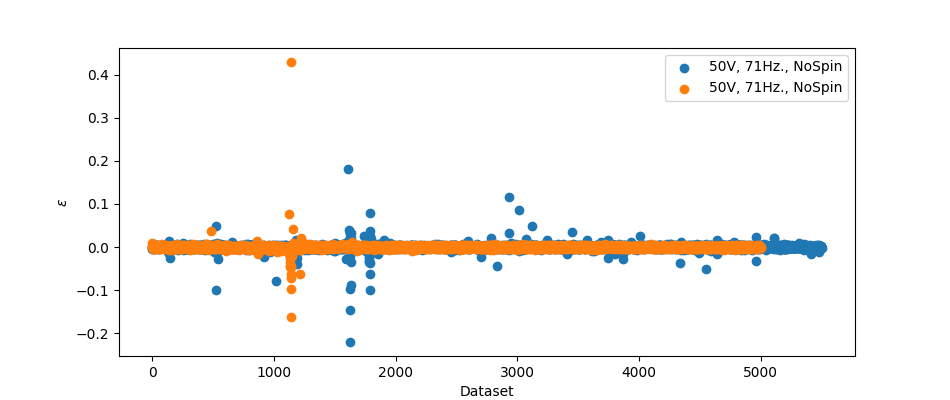

In [40]:
_, ax= plt.subplots(figsize=(9.5,4))
ax.scatter(range(5500), mm_71Hz50VNoSpin/5/scaleX, label='50V, 71Hz., NoSpin')
ax.scatter(range(5000), mm_71Hz50VNoSpin2/5/scaleX, label='50V, 71Hz., NoSpin')
ax.set(xlabel='Dataset', ylabel=r'$\epsilon$')
ax.legend()

In [41]:
tmpp = mm_71Hz50VNoSpin/5/scaleX
means = [np.mean(tmpp[j*100:(j+1)*100]) for j in range(55)]
stds = [np.std(tmpp[j*100:(j+1)*100]) for j in range(55)]

tmpp2 = mm_71Hz50VNoSpin2/5/scaleX
means2 = [np.mean(tmpp2[j*100:(j+1)*100]) for j in range(50)]
stds2 = [np.std(tmpp2[j*100:(j+1)*100]) for j in range(50)]

<IPython.core.display.Javascript object>


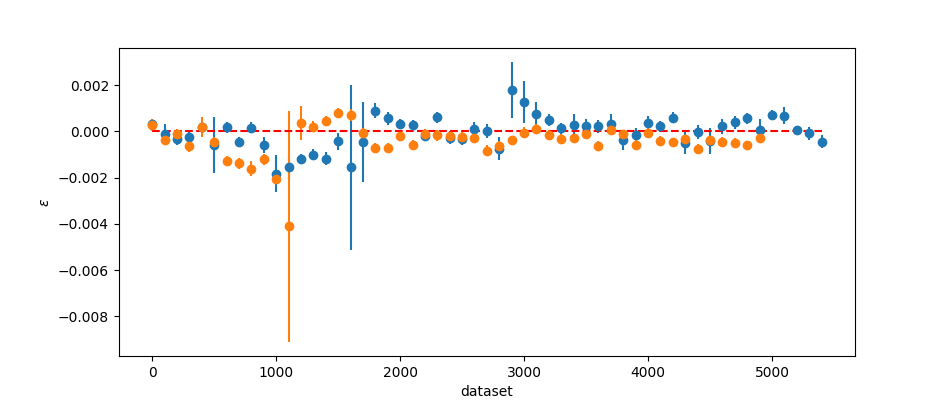

[Text(0, 0.5, '$\\epsilon$'), Text(0.5, 0, 'dataset')]

In [42]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5500,100), means, yerr=stds/np.sqrt(100),fmt='o')
ax.errorbar(np.arange(0,5000,100), means2, yerr=stds2/np.sqrt(100),fmt='o')
ax.plot(np.arange(0,5500,100), np.arange(0,5500,100)*0, 'r--')
ax.set(xlabel='dataset', ylabel=r'$\epsilon$')

### Look at the spin

In [175]:
def func2(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz50VNoSpin2/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    aa, bb = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 200000)

    return np.mean(aa[(bb>60)*(bb<20000)])*1e10

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    spin2_71Hz50VNoSpin2_Y = np.array(pool.map(func2, range(5000)))
    pool.close()

992   ******************
160   ******************
736   ******************
0   ******************
352   ******************
192   ******************
32   ******************
96   ******************
1152   ******************
960   ******************
1120   ******************
64   ******************
288   ******************
416   ******************
800   ******************
256   ******************
480   ******************
1024   ******************
1088   ******************
224   ******************
896   ******************
384   ******************
1216   ******************
1056   ******************
928   ******************
512   ******************
320   ******************
576   ******************
128   ******************
864   ******************
640   ******************
832   ******************
768   ******************
1184   ******************
448   ******************
672   ******************
1248   ******************
608   ******************
544   ******************
704   ****************

999   ******************
491   ******************
1097   ******************
776   ******************
1193   ******************
1063   ******************
361   ******************
650   ******************
71   ******************
520   ******************
167   ******************
711   ******************
1256   ******************
616   ******************
329   ******************
839   ******************
1032   ******************
745   ******************
425   ******************
1160   ******************
968   ******************
457   ******************
136   ******************
199   ******************
1224   ******************
872   ******************
903   ******************
809   ******************
1098   ******************
554   ******************
521   ******************
585   ******************
232   ******************
1127   ******************
362   ******************
937   ******************
712   ******************
680   ******************
617   ******************
1064   **********

783   ******************
560   ******************
270   ******************
943   ******************
301   ******************
335   ******************
1006   ******************
399   ******************
1303   ******************
237   ******************
879   ******************
368   ******************
686   ******************
1199   ******************
656   ******************
1167   ******************
1039   ******************
10   ******************
912   ******************
499   ******************
142   ******************
432   ******************
205   ******************
1231   ******************
1071   ******************
847   ******************
1263   ******************
400   ******************
108   ******************
719   ******************
529   ******************
561   ******************
592   ******************
753   ******************
1105   ******************
465   ******************
1134   ******************
1304   ******************
626   ******************
687   *********

1425   ******************
1108   ******************
402   ******************
639   ******************
211   ******************
885   ******************
1426   ******************
1452   ******************
1479   ******************
212   ******************
1203   ******************
1504   ******************
886   ******************
756   ******************
1427   ******************
1074   ******************
1453   ******************
1480   ******************
213   ******************
1428   ******************
1505   ******************
916   ******************
887   ******************
1454   ******************
214   ******************
274   ******************
1481   ******************
1506   ******************
1137   ******************
917   ******************
338   ******************
436   ******************
1507   ******************
275   ******************
1334   ******************
888   ******************
1482   ******************
215   ******************
1455   ******************
918 

1336   ******************
508   ******************
1736   ******************
1557   ******************
1705   ******************
1399   ******************
1244   ******************
413   ******************
571   ******************
606   ******************
111   ******************
1673   ******************
1558   ******************
1706   ******************
1580   ******************
1649   ******************
1737   ******************
1245   ******************
1707   ******************
414   ******************
1400   ******************
1616   ******************
1581   ******************
607   ******************
1674   ******************
1708   ******************
1738   ******************
1650   ******************
1246   ******************
509   ******************
1709   ******************
1582   ******************
415   ******************
572   ******************
1464   ******************
1617   ******************
1675   ******************
1527   ******************
789   ****************

1955   ******************
1174   ******************
798   ******************
124   ******************
1925   ******************
1986   ******************
2016   ******************
1908   ******************
21   ******************
799   ******************
125   ******************
1956   ******************
2017   ******************
1987   ******************
350   ******************
1593   ******************
2048   ******************
1957   ******************
22   ******************
1926   ******************
2018   ******************
1339   ******************
1988   ******************
1909   ******************
126   ******************
1594   ******************
1927   ******************
1958   ******************
23   ******************
2049   ******************
1989   ******************
127   ******************
351   ******************
1685   ******************
2019   ******************
1990   ******************
24   ******************
1928   ******************
1720   ******************
20

2306   ******************
1687   ******************
1655   ******************
2338   ******************
2370   ******************
55   ******************
2307   ******************
56   ******************
1971   ******************
2282   ******************
2371   ******************
2129   ******************
1812   ******************
2339   ******************
2308   ******************
2283   ******************
57   ******************
1723   ******************
2372   ******************
1941   ******************
2309   ******************
2340   ******************
2284   ******************
58   ******************
2373   ******************
2285   ******************
2341   ******************
2310   ******************
2374   ******************
2286   ******************
1598   ******************
2221   ******************
2342   ******************
59   ******************
1079   ******************
2311   ******************
2375   ******************
1624   ******************
2343   ***************

1946   ******************
2257   ******************
2548   ******************
1275   ******************
1727   ******************
2472   ******************
2103   ******************
1817   ******************
2072   ******************
2137   ******************
2441   ******************
2040   ******************
1752   ******************
2353   ******************
2410   ******************
2593   ******************
1661   ******************
2383   ******************
2500   ******************
2583   ******************
857   ******************
2195   ******************
2168   ******************
2625   ******************
1882   ******************
2325   ******************
2006   ******************
2294   ******************
1977   ******************
2549   ******************
1818   ******************
2229   ******************
2258   ******************
29   ******************
1083   ******************
1788   ******************
2138   ******************
1629   ******************
2073   ********

2819   ******************
2983   ******************
2882   ******************
3012   ******************
2984   ******************
2853   ******************
2951   ******************
2692   ******************
3043   ******************
2603   ******************
2917   ******************
2787   ******************
2820   ******************
2516   ******************
3013   ******************
3044   ******************
2985   ******************
2235   ******************
2693   ******************
2447   ******************
3014   ******************
2517   ******************
2854   ******************
3045   ******************
2883   ******************
2952   ******************
2694   ******************
2855   ******************
2821   ******************
1278   ******************
3015   ******************
2725   ******************
2518   ******************
2695   ******************
3046   ******************
2856   ******************
2884   ******************
2953   ******************
2519   *****

2762   ******************
2864   ******************
3204   ******************
2969   ******************
2734   ******************
3233   ******************
2830   ******************
2865   ******************
2556   ******************
3234   ******************
2866   ******************
3205   ******************
2763   ******************
2831   ******************
3235   ******************
2202   ******************
2867   ******************
2832   ******************
2735   ******************
3206   ******************
3236   ******************
2764   ******************
2868   ******************
2266   ******************
3264   ******************
2237   ******************
3237   ******************
2765   ******************
2736   ******************
2833   ******************
2869   ******************
3265   ******************
3238   ******************
2450   ******************
2419   ******************
2737   ******************
3239   ******************
2766   ******************
2870   *****

2392   ******************
3290   ******************
3460   ******************
3068   ******************
3620   ******************
2364   ******************
3141   ******************
2205   ******************
3461   ******************
3621   ******************
3431   ******************
2939   ******************
3259   ******************
3522   ******************
3305   ******************
3212   ******************
2206   ******************
3369   ******************
2365   ******************
3590   ******************
3100   ******************
3396   ******************
3523   ******************
3370   ******************
2207   ******************
3524   ******************
2366   ******************
3128   ******************
3397   ******************
2483   ******************
3557   ******************
2431   ******************
3371   ******************
3648   ******************
3398   ******************
3591   ******************
3462   ******************
3372   ******************
3649   *****

3499   ******************
2494   ******************
2942   ******************
3657   ******************
3294   ******************
3354   ******************
4001   ******************
3477   ******************
3532   ******************
3786   ******************
3500   ******************
3355   ******************
3627   ******************
3812   ******************
3262   ******************
3039   ******************
3877   ******************
3478   ******************
3658   ******************
3533   ******************
3356   ******************
3405   ******************
3479   ******************
3501   ******************
3561   ******************
3659   ******************
3449   ******************
3357   ******************
3813   ******************
3314   ******************
3534   ******************
3502   ******************
3480   ******************
2495   ******************
3406   ******************
3971   ******************
3660   ******************
2847   ******************
3628   *****

3422   ******************
3612   ******************
4512   ******************
4513   ******************
4514   ******************
3423   ******************
4515   ******************
3942   ******************
3183   ******************
4516   ******************
3390   ******************
3975   ******************
3848   ******************
3733   ******************
4196   ******************
3883   ******************
4039   ******************
3485   ******************
3818   ******************
4544   ******************
3581   ******************
3184   ******************
3149   ******************
4071   ******************
4102   ******************
3763   ******************
3391   ******************
4452   ******************
3550   ******************
3185   ******************
3326   ******************
3134   ******************
4325   ******************
3791   ******************
3186   ******************
4164   ******************
3187   ******************
3188   ******************
3189   *****

3156   ******************
4393   ******************
4235   ******************
3157   ******************
3158   ******************
4108   ******************
3825   ******************
3981   ******************
3159   ******************
3160   ******************
3855   ******************
3161   ******************
4331   ******************
4491   ******************
3162   ******************
4300   ******************
3163   ******************
4774   ******************
3164   ******************
4014   ******************
4869   ******************
3165   ******************
3166   ******************
3771   ******************
3167   ******************
4928   ******************
4807   ******************
4929   ******************
4646   ******************
4204   ******************
3741   ******************
3708   ******************
4362   ******************
4077   ******************
4709   ******************
4109   ******************
4460   ******************
4899   ******************
3889   *****

4532   ******************
4117   ******************
4654   ******************
4880   ******************
4992   ******************
4051   ******************
4782   ******************
4021   ******************
4908   ******************
3954   ******************
4370   ******************
4341   ******************
4533   ******************
4848   ******************
4593   ******************
4783   ******************
4961   ******************
4754   ******************
4468   ******************
4178   ******************
4084   ******************
3988   ******************
4690   ******************
4717   ******************
4655   ******************
4243   ******************
4402   ******************
4817   ******************
4881   ******************
4818   ******************
3862   ******************
4625   ******************
4149   ******************
3801   ******************
4501   ******************
3925   ******************
4276   ******************
4941   ******************
3926   *****

4058   ******************
4438   ******************
4282   ******************
4541   ******************
4724   ******************
4634   ******************
4250   ******************
4411   ******************
3870   ******************
4977   ******************
4156   ******************
3995   ******************
4920   ******************
4699   ******************
4476   ******************
4348   ******************
3805   ******************
3933   ******************
4792   ******************
3996   ******************
4029   ******************
4601   ******************
4725   ******************
4667   ******************
4858   ******************
4184   ******************
4412   ******************
4764   ******************
4542   ******************
4124   ******************
4978   ******************
4507   ******************
3934   ******************
4314   ******************
4251   ******************
4157   ******************
3997   ******************
4377   ******************
4668   *****

In [33]:
avg_spin_calib = np.mean(spin_calib)
avg_spin_calib

0.027157062370710076

<IPython.core.display.Javascript object>


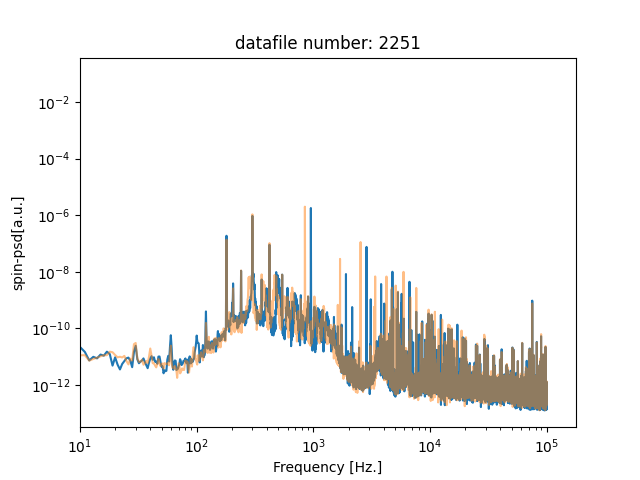

2.8478720172579974
950.0


In [189]:
datafile_num = 2251
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50V50kHzSpin/Discharge_'+str(datafile_num)+'.h5'
fname = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin2/Discharge_'+str(datafile_num)+'.h5'

fname = r'/data/new_trap/20200730/Bead2/InitialTest/Data65.h5'

fname1 = r'/data/new_trap/20200730/Bead2/Neutrality/71Hz50VNoSpin2/Discharge_'+str(datafile_num)+'.h5'
# fname = r'/data/new_trap/20200730/Bead2/Discharge/ForceCalibration/Discharge_'+str(datafile_num)+'.h5'
fname = r'/data/new_trap/20200730/Bead2/NeutralityOnY/71Hz50VNoSpin2/Discharge_'+str(datafile_num)+'.h5'

bb = BeadDataFile.BeadDataFile(fname=fname)
bb1 = BeadDataFile.BeadDataFile(fname=fname1)
_,ax = plt.subplots()
a, b = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 200000)
ax.loglog(b, a)
aa1, bb1 = matplotlib.mlab.psd(bb1.spin_data, Fs = 200000, NFFT = 200000)
ax.loglog(bb1, aa1, alpha=0.5)
ax.set(xlim=(10,None), xlabel='Frequency [Hz.]', ylabel='spin-psd[a.u.]', title='datafile number: '+str(datafile_num))
print(np.mean(a[(b>60)*(b<20000)])*1e10)

b, a = matplotlib.mlab.psd(bb.spin_data, Fs = 200000, NFFT = 20000)
cutoff = int(500/10)
print(a[np.argmax(b[cutoff:700])+cutoff])

<IPython.core.display.Javascript object>


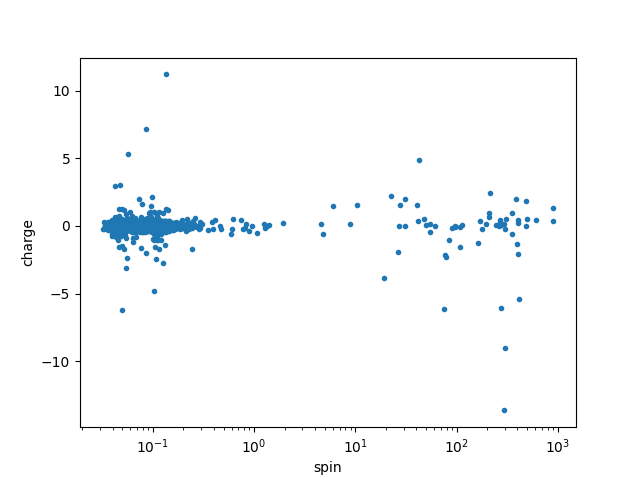

[Text(0, 0.5, 'charge'), Text(0.5, 0, 'spin')]

In [61]:
_,ax = plt.subplots()
ax.semilogx(spin_71Hz50VNoSpin, mm_71Hz50VNoSpin,'.')
ax.set(xlabel='spin', ylabel='charge')

<IPython.core.display.Javascript object>


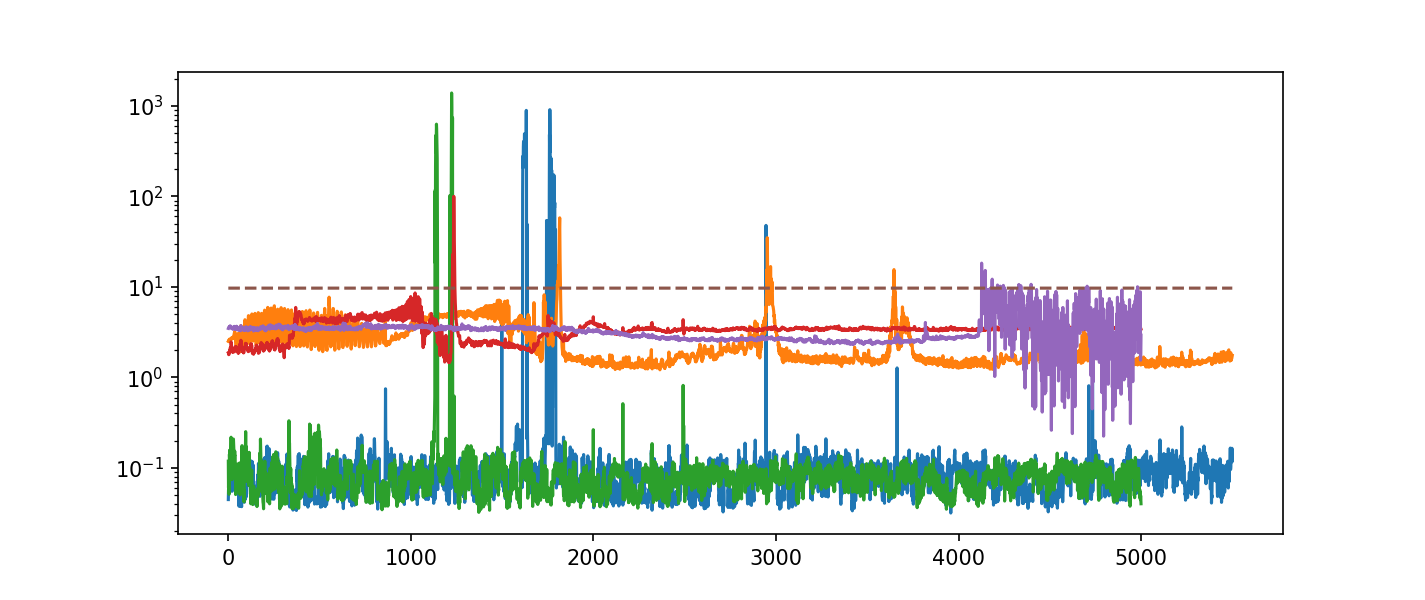

In [176]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.semilogy(range(5500), spin_71Hz50VNoSpin)
ax.semilogy(range(5500), spin2_71Hz50VNoSpin)
ax.semilogy(range(5000), spin_71Hz50VNoSpin2)
ax.semilogy(range(5000), spin2_71Hz50VNoSpin2)
# ax.semilogy(range(500), spin_71Hz200VNoSpin_Y)
ax.semilogy(range(5000), spin2_71Hz50VNoSpin2_Y)
ax.semilogy(np.arange(5500), np.arange(5500)*0+th,'--')

In [68]:
th = np.mean(spin_calib)+ 6*np.std(spin_calib)
th

0.058477615308123385

In [50]:
data = [mmm for mmm,sss in zip(mm_71Hz50VNoSpin/5/scaleX, spin_71Hz50VNoSpin) if (mmm<0.01)&(mmm>-0.01) if sss<th]
np.mean(data), len(data), np.std(data)/np.sqrt(len(data))

(0.00011562111772482751, 281, 0.00013672779883461248)

In [51]:
data = [mmm for mmm,sss in zip(mm_71Hz50VNoSpin2/5/scaleX, spin_71Hz50VNoSpin2) if (mmm<0.01)&(mmm>-0.01) if sss<th]
np.mean(data), len(data), np.std(data)/np.sqrt(len(data))

(-0.00022677519390759424, 188, 0.0001589321680739802)

In [137]:
c_mean2 = []
c_std2 = []
for th in np.arange(1.7,10,1):
#     th = np.mean(spin_calib)+ i*np.std(spin_calib)
    data = [mmm for mmm,sss in zip(mm_71Hz50VNoSpin2/5/scaleX, spin2_71Hz50VNoSpin2) if (mmm<0.4)&(mmm>-0.4) if sss<th]
    c_mean2.append(np.mean(data))
    c_std2.append(np.std(data)/np.sqrt(len(data)))

<IPython.core.display.Javascript object>


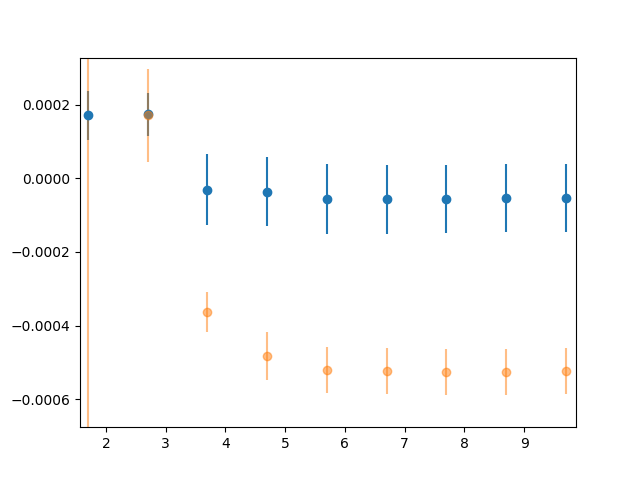

<ErrorbarContainer object of 3 artists>

In [138]:
_,ax = plt.subplots()
ax.errorbar(np.arange(1.7,10,1), c_mean, yerr=c_std,fmt='o')
ax.errorbar(np.arange(1.7,10,1), c_mean2, yerr=c_std2,fmt='o',alpha=0.5)